<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Terrorism_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

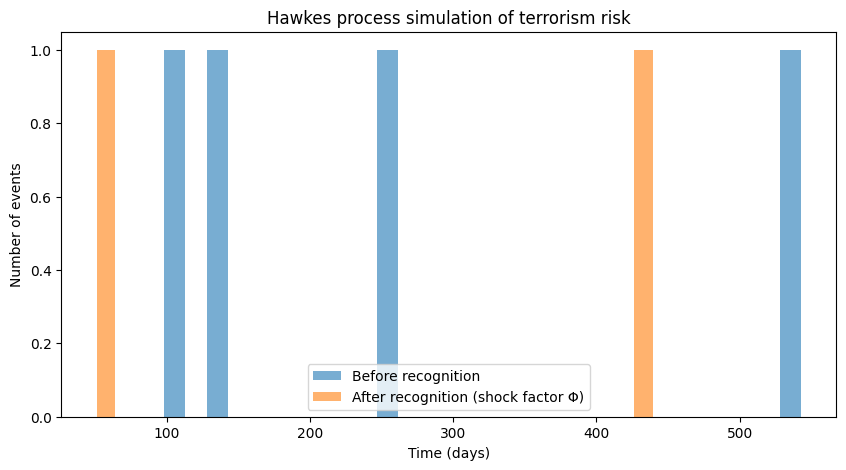

Events before recognition: 4
Events after recognition : 2


In [ ]:
# Terrorism risk simulation with a Hawkes process
# Econophysics analogy: liquidity of violence

import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 365   # simulation horizon (days)
mu = 0.01  # baseline intensity (events/day)
alpha_base = 0.1   # contagion strength (before recognition)
alpha_shock = 0.3  # contagion strength (after recognition)
decay = 0.1        # memory decay (days^-1)

def simulate_hawkes(mu, alpha, decay, T):
    t, events = 0, []
    intensity = mu
    while t < T:
        # Next event candidate
        u = np.random.rand()
        w = -np.log(u) / intensity
        t += w
        # Update intensity
        past_effects = np.sum(np.exp(-decay*(t - np.array(events)))) if events else 0
        lambda_t = mu + alpha * past_effects
        # Accept or reject event
        if np.random.rand() < lambda_t / intensity:
            events.append(t)
        intensity = lambda_t
    return np.array(events)

# Run two scenarios
np.random.seed(42)
events_before = simulate_hawkes(mu, alpha_base, decay, T)
events_after = simulate_hawkes(mu, alpha_shock, decay, T)

# Plot
plt.figure(figsize=(10,5))
plt.hist(events_before, bins=30, alpha=0.6, label="Before recognition")
plt.hist(events_after, bins=30, alpha=0.6, label="After recognition (shock factor Φ)")
plt.xlabel("Time (days)")
plt.ylabel("Number of events")
plt.title("Hawkes process simulation of terrorism risk")
plt.legend()
plt.show()

print("Events before recognition:", len(events_before))
print("Events after recognition :", len(events_after))
